In [28]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

### CNN

In [29]:
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers.legacy import Adam

# load dataset
(trainX, trainy), (testX, testy) = fashion_mnist.load_data()

# reshape dataset to have a single channel
trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
testX = testX.reshape((testX.shape[0], 28, 28, 1))

# build the model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(10, activation='softmax'))

# compile the model
model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# fit the model
history=model.fit(trainX, trainy, epochs=10, batch_size=32, validation_data=(testX, testy))

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.7070 - accuracy: 0.8497 - val_loss: 0.3698 - val_accuracy: 0.8683
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2865 - accuracy: 0.8983 - val_loss: 0.3449 - val_accuracy: 0.8735
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2464 - accuracy: 0.9098 - val_loss: 0.3401 - val_accuracy: 0.8850
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2233 - accuracy: 0.9166 - val_loss: 0.3485 - val_accuracy: 0.8871
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2035 - accuracy: 0.9240 - val_loss: 0.3444 - val_accuracy: 0.8904
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1880 - accuracy: 0.9305 - val_loss: 0.3409 - val_accuracy: 0.8952
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1707 - accuracy: 0.9360 - val_loss: 0.3927 - val_accuracy:

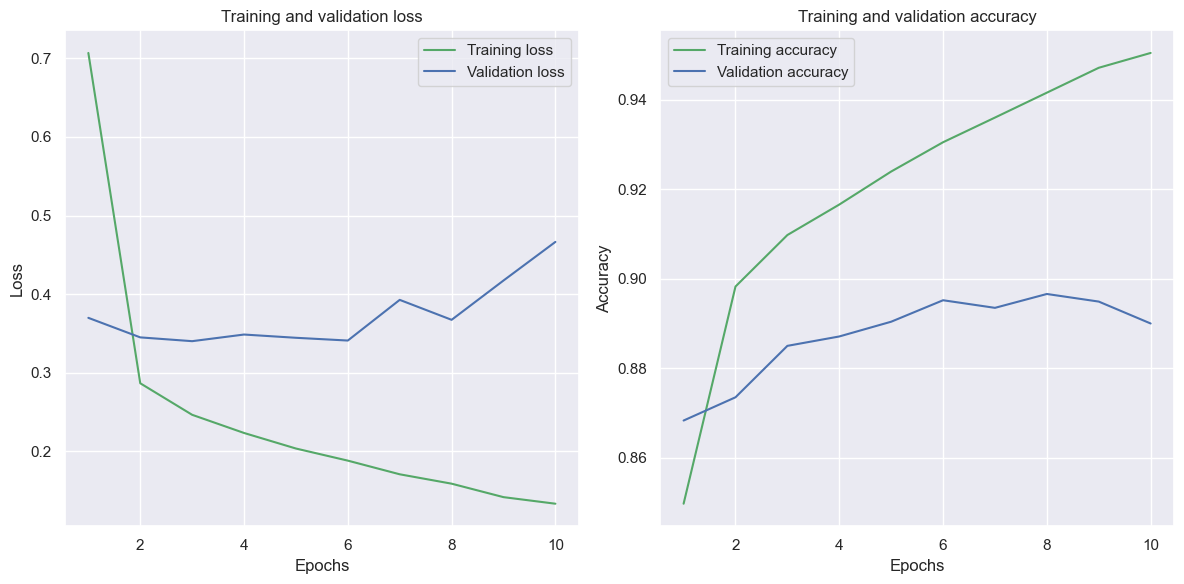

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# "History" object keeps the history of loss and metric values in history.history:
history_dict = history.history

# Plot Training and validation loss:

loss_values = history_dict['loss']  # Loss values for training
val_loss_values = history_dict['val_loss'] # Loss values for validation
epochs = range(1, len(loss_values) + 1) # X-axis values

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.plot(epochs, loss_values, 'g', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot Training and validation accuracy:

acc_values = history_dict['accuracy']  # accuracy values for training
val_acc_values = history_dict['val_accuracy'] # accuracy values for validation

plt.subplot(1,2,2)
plt.plot(epochs, acc_values, 'g', label='Training accuracy')
plt.plot(epochs, val_acc_values, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [31]:
loss, accuracy = model.evaluate(testX, testy)
print('\nTest loss: %.2f' % loss)
print('Test accuracy: %.2f' % accuracy)

313/313 [==============================] - 0s 1ms/step - loss: 0.4664 - accuracy: 0.8900

Test loss: 0.47
Test accuracy: 0.89


### VGG16

In [32]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras import Model
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers.legacy import Adam
import numpy as np
from tensorflow.keras.preprocessing.image import array_to_img, img_to_array

# load the VGG16 model without the final layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

# make the weights of the base model non-trainable
for layer in base_model.layers:
    layer.trainable = False

# add your own final layers
x = Flatten()(base_model.output)
x = Dense(100, activation='relu')(x)
predictions = Dense(10, activation='softmax')(x)

# create a new model
model = Model(inputs=base_model.input, outputs=predictions)

# compile and fit the model
model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# function to resize and convert images
def process_images(X):
    X_processed = []
    for image in X:
        # convert array to image
        img = array_to_img(image, scale=False)
        # resize the image to 32x32
        img = img.resize((32, 32))
        # convert back to array
        img_array = img_to_array(img)
        # convert single channel grayscale to three channel RGB
        img_array = np.repeat(img_array, 3, axis=2)
        X_processed.append(img_array)
    return np.array(X_processed)

# reshape the images in trainX and testX
trainX = process_images(trainX)
testX = process_images(testX)

history=model.fit(trainX, trainy, epochs=50, batch_size=32, validation_data=(testX, testy))

Epoch 1/50
1875/1875 [==============================] - 148s 79ms/step - loss: 0.8710 - accuracy: 0.7804 - val_loss: 0.5104 - val_accuracy: 0.8165
Epoch 2/50
1875/1875 [==============================] - 149s 79ms/step - loss: 0.4488 - accuracy: 0.8385 - val_loss: 0.4964 - val_accuracy: 0.8283
Epoch 3/50
1875/1875 [==============================] - 148s 79ms/step - loss: 0.4094 - accuracy: 0.8505 - val_loss: 0.4644 - val_accuracy: 0.8339
Epoch 4/50
1875/1875 [==============================] - 148s 79ms/step - loss: 0.3873 - accuracy: 0.8569 - val_loss: 0.4767 - val_accuracy: 0.8328
Epoch 5/50
1875/1875 [==============================] - 151s 80ms/step - loss: 0.3674 - accuracy: 0.8648 - val_loss: 0.4747 - val_accuracy: 0.8364
Epoch 6/50
1875/1875 [==============================] - 149s 79ms/step - loss: 0.3537 - accuracy: 0.8687 - val_loss: 0.4831 - val_accuracy: 0.8327
Epoch 7/50
1875/1875 [==============================] - 149s 80ms/step - loss: 0.3356 - accuracy: 0.8747 - val_loss: 0

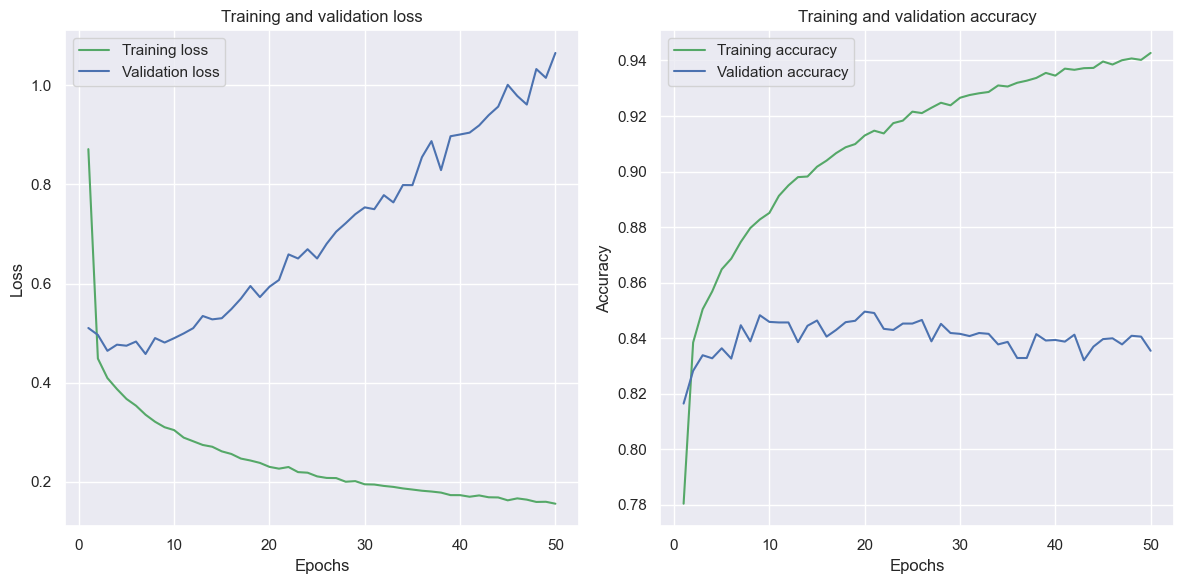

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# "History" object keeps the history of loss and metric values in history.history:
history_dict = history.history

# Plot Training and validation loss:

loss_values = history_dict['loss']  # Loss values for training
val_loss_values = history_dict['val_loss'] # Loss values for validation
epochs = range(1, len(loss_values) + 1) # X-axis values

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.plot(epochs, loss_values, 'g', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot Training and validation accuracy:

acc_values = history_dict['accuracy']  # accuracy values for training
val_acc_values = history_dict['val_accuracy'] # accuracy values for validation

plt.subplot(1,2,2)
plt.plot(epochs, acc_values, 'g', label='Training accuracy')
plt.plot(epochs, val_acc_values, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [34]:
loss, accuracy = model.evaluate(testX, testy)
print('\nTest loss: %.2f' % loss)
print('Test accuracy: %.2f' % accuracy)

313/313 [==============================] - 21s 66ms/step - loss: 1.0649 - accuracy: 0.8355

Test loss: 1.06
Test accuracy: 0.84


In [35]:
model.save('./model/vgg16_model_ii.h5')

### Conclusion

В заключение, использование weights от pre-trained моделей (как VGG16) может иметь преимущества в части экономии времени расчетов и ресурсов памяти, однако стоит обращать внимание на соответствие начальных параметров обучения модели конечной цели задачи. Transfer learning работает лучше всего, когда входные данные аналогичны данным, на которых обучалась предварительно обученная модель. В нашем случае, используя VGG16 (которые являются предварительно-тренированными на RGB изображениях) для изображений в оттенках серого от fashion_MNIST dataset не может быть оптимальным выбором. Для задач с изображениями в оттенках серого, возможно, стоит изучить предварительно обученные сети, обученные на аналогичных наборах данных в оттенках серого, или рассмотреть возможность обучения более подходящих моделей с нуля.